<a href="https://colab.research.google.com/github/diana-rahma/Machine-Learning_Ganjil25_11/blob/main/JS11_Klasifikasi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JOBSHEET 11 - KLASIFIKASI 2

Nama: Diana Rahmawati <br>
NIM: 2341720162 <br>
Kelas: TI - 3G

## Praktikum 1

In [1]:
!pip install ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.6 MB/s eta 0:00:00


In [2]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC
from sklearn.datasets import make_blobs


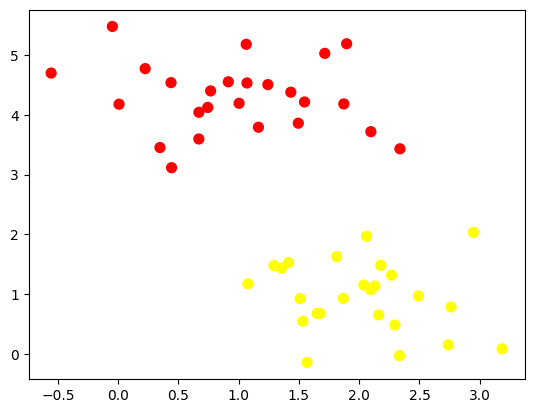

In [ ]:
# Membuat Data Dummy

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

(-1.0, 3.5)

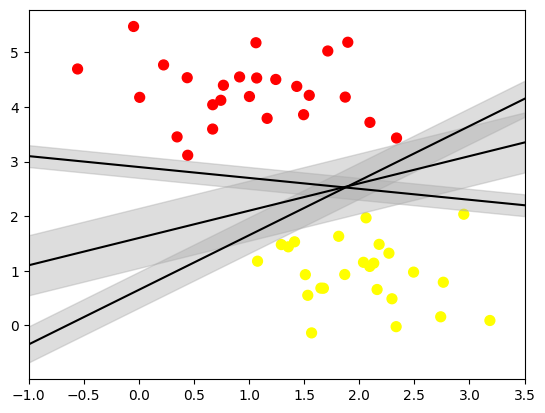

In [ ]:
# Buat Ilustrasi Garis Pemisah - Ilustrasi Margin

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
# Fitting Model

from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

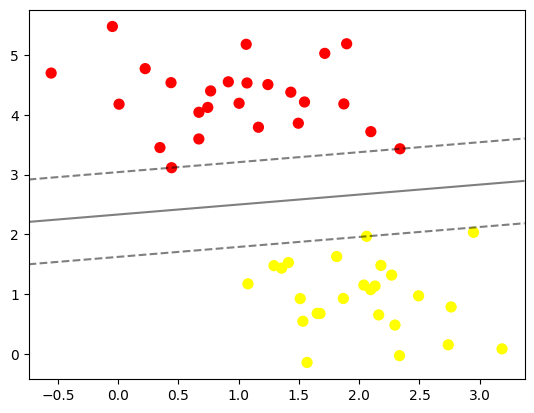

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [ ]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

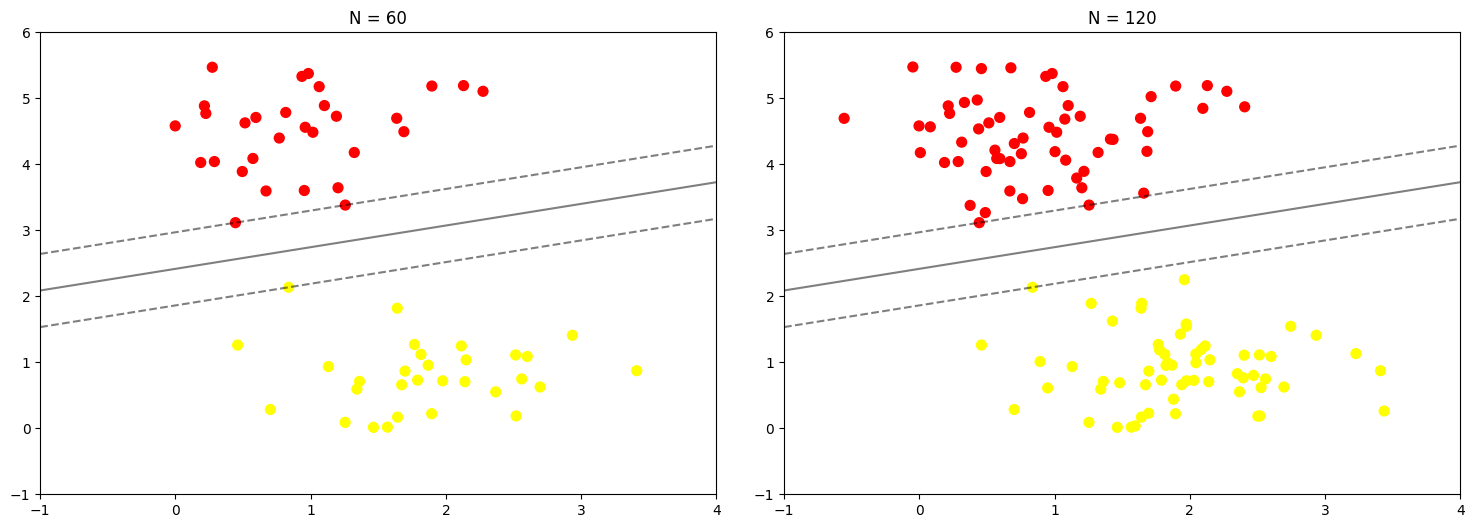

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [ ]:
# jumlah data dapat dipilih di antara 10 atau 200 buah data, telihat tidak ada perubahan pada model

from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

<function __main__.plot_svm(N=10, ax=None)>

## Praktikum 2

In [ ]:
# Ilustrasi Data Non-Linier
# Langkah 1a - Import Library

# Langkah 1b - Buat Kembali Fungsi Plotting

# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

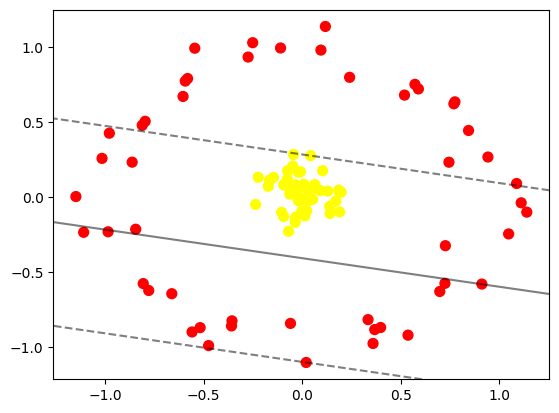

In [ ]:
# Langkah 1c - Buat Data Dummy Non-Linier

# contoh data tidak terpisah secara linier
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    r = np.exp(-(X ** 2).sum(1))
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 5.89629874e-01,  7.20351064e-01],
       [ 8.44190094e-01,  4.43555348e-01],
       [ 3.34170067e-01, -8.15859976e-01],
       [-5.18092197e-01, -8.69253220e-01],
       [ 1.17604323e-01,  1.13624021e+00],
       [-6.90735932e-02, -2.27748647e-01],
       [ 4.25882489e-02,  2.75837863e-01],
       [-6.04733749e-01,  6.70244730e-01],
       [ 9.34767635e-02,  4.28290275e-02],
       [-3.37717930e-02,  1.58968116e-02],
       [-8.74052263e-02,  8.77842297e-02],
       [-2.74463643e-01,  9.32594344e-01],
       [-1.10917969e+00, -2.34447969e-01],
       [ 6.98092172e-01, -6.28567962e-01],
       [ 1.97391366e-01,  3.31954808e-02],
       [ 1.04753998e+00, -2.45176950e-01],
       [-1.14855660e+00,  3.59213004e-03],
       [-2.51298495e-01,  1.02824613e+00],
       [ 9.11692631e-01, -5.79061240e-01],
       [ 5.19159598e-01,  6.79238608e-01],
       [-1.09923017e-01,  9.92985881e-01],
       [ 7.74991215e-01,  6.34316576e-01],
       [ 1.29756164e-01,  4.02069259e-02],
       [ 1.39588646e-01, -6.16525635e-02],
       [-1.01592333e+00,  2.57840364e-01],
       [-9.11777737e-03,  1.68571001e-01],
       [ 1.41210224e-01, -1.08886109e-01],
       [-3.09466610e-02,  6.45275996e-02],
       [ 1.08803423e+00,  9.05503940e-02],
       [-3.41045719e-02,  8.23462585e-02],
       [-2.84857970e-03, -1.85725934e-02],
       [ 1.13981464e+00, -1.00022224e-01],
       [-2.10214061e-02,  1.66835941e-01],
       [-7.42258907e-02,  1.76202590e-01],
       [-1.72284440e-01,  7.21247381e-02],
       [-5.93355894e-01,  7.72708349e-01],
       [-2.36339756e-01, -4.93017273e-02],
       [ 8.94827790e-03,  8.56767926e-02],
       [-1.94780352e-02, -2.41947815e-02],
       [ 7.26644508e-01, -3.23484379e-01],
       [ 5.27624951e-02, -1.46711273e-02],
       [ 1.11131626e+00, -3.81007853e-02],
       [ 9.42584879e-01,  2.66912657e-01],
       [-7.96877164e-01,  5.04833811e-01],
       [-9.49699243e-03,  6.68455696e-02],
       [-4.41161276e-02,  2.83805603e-01],
       [ 1.89987350e-01, -9.82921826e-02],
       [-4.75037859e-01, -9.88874400e-01],
       [-8.11874645e-01,  4.78705314e-01],
       [ 5.36967253e-01, -9.19364569e-01],
       [-9.78838706e-01,  4.25628802e-01],
       [-3.46636490e-02,  6.75330898e-02],
       [ 1.88906372e-01,  3.49812343e-02],
       [-4.80108202e-02,  2.06454427e-01],
       [-8.06753256e-01, -5.75784768e-01],
       [ 2.26366645e-02, -9.18193896e-02],
       [ 3.86644754e-02, -1.96931018e-02],
       [-3.56374689e-01, -8.24083305e-01],
       [-5.45222114e-01,  9.91557135e-01],
       [ 3.68041389e-01, -8.82244874e-01],
       [ 1.70254556e-01, -2.65799326e-02],
       [-5.58949766e-01, -8.98060915e-01],
       [ 6.37513604e-02,  8.35146059e-02],
       [ 7.44759529e-01,  2.32356187e-01],
       [-6.28208981e-02,  1.98848793e-02],
       [-1.04353837e-01, -1.01039000e-01],
       [-1.66171847e-01,  1.13327493e-01],
       [-1.91890048e-03, -9.20141687e-02],
       [ 1.34637022e-02, -1.24856802e-01],
       [-5.81684052e-01,  7.89572901e-01],
       [-8.45094885e-01, -2.13911611e-01],
       [-7.57824545e-02,  1.19795520e-01],
       [-2.23306236e-01,  1.32092802e-01],
       [-5.95004051e-02, -8.41043394e-01],
       [-9.36480026e-02,  8.07983991e-02],
       [ 1.03548590e-01,  1.75893795e-01],
       [-8.62999765e-01,  2.32700616e-01],
       [-7.78852016e-01, -6.21974743e-01],
       [ 1.85736024e-01,  4.67546702e-02],
       [ 3.59412130e-01, -9.74631084e-01],
       [ 6.83035281e-02,  5.76044830e-02],
       [-9.40378583e-02, -1.29713258e-01],
       [ 3.04413992e-02,  4.47749566e-02],
       [-6.61828098e-01, -6.43228250e-01],
       [ 9.49887342e-02,  9.79010428e-01],
       [ 1.78836738e-02, -5.26086949e-04],
       [-1.45853271e-01,  1.30798871e-01],
       [-9.85179846e-01, -2.30901807e-01],
       [ 2.01655354e-02, -1.10127869e+00],
       [-2.44246638e-02,  7.46536625e-03],
       [-6.61017590e-02,  6.15987207e-02],
       [ 2.28847443e-02, -2.19938298e-02

In [ ]:
# Fitting Model

clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

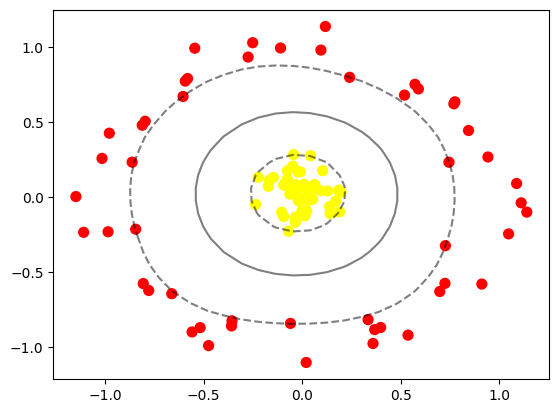

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

## Praktikum 3

In [ ]:
# Buat Fungsi Plotting
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

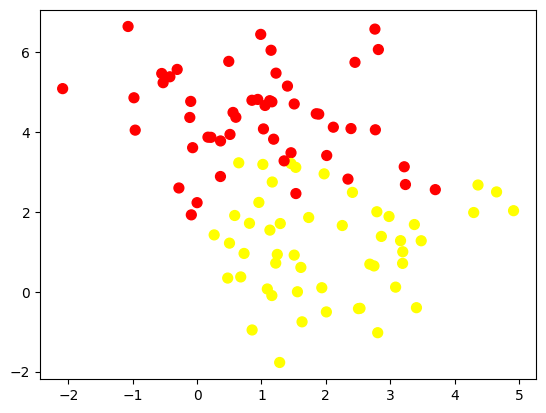

In [ ]:
# Buat Data Dummy

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

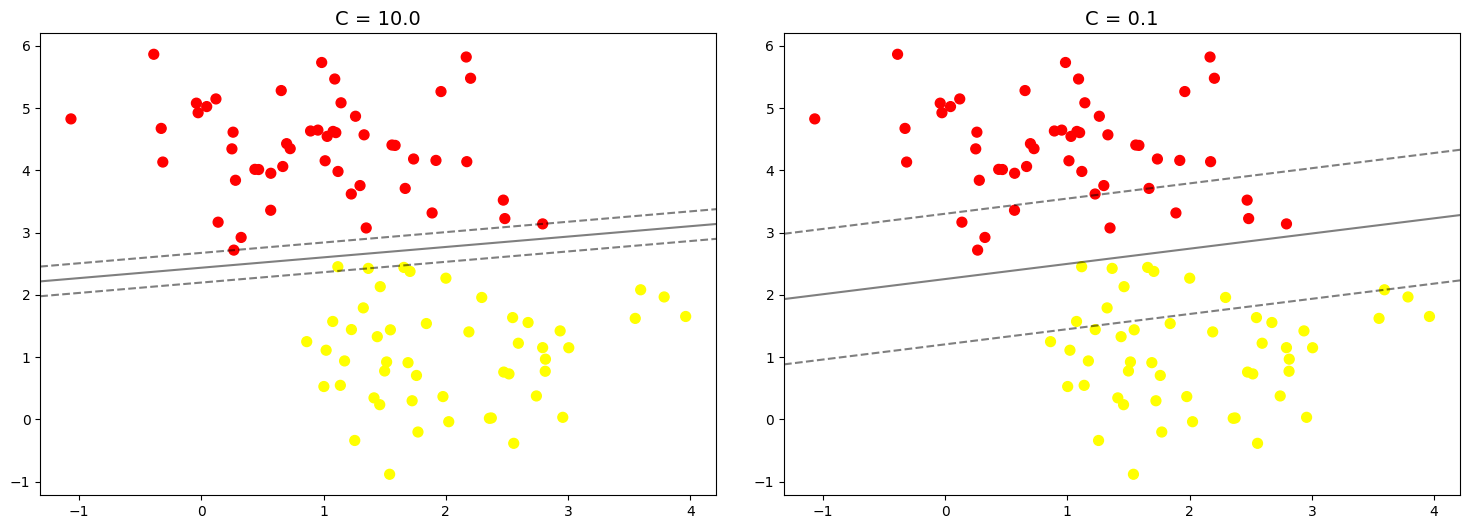

In [ ]:
# Analisis Dampak Tunning

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## Praktikum 4

In [ ]:
# Unduh Dataset

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


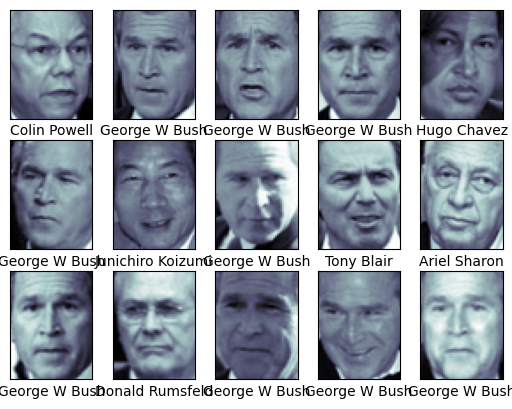

In [ ]:
# Inspeksi Citra Wajah

# contoh wajah yang digunakan
from matplotlib import pyplot as plt

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [ ]:
# Pra Pengolahan Data

from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')

# Pipeline digunakan untuk melakukan proses secara bertahap dalam
# 1 eksekusi fungsi secara langsung
model = make_pipeline(pca, svc)


In [ ]:
# Split Data

# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

CPU times: user 1min 53s, sys: 96.4 ms, total: 1min 54s
Wall time: 1min 8s
{'svc__C': 5, 'svc__gamma': 0.001}
0.828893332683022


In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

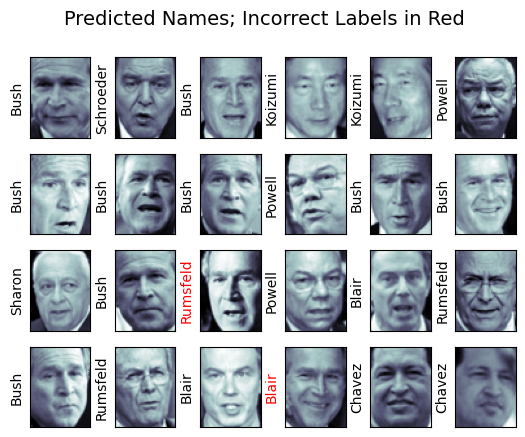

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.87      0.74        15
     Colin Powell       0.83      0.88      0.86        68
  Donald Rumsfeld       0.70      0.84      0.76        31
    George W Bush       0.97      0.80      0.88       126
Gerhard Schroeder       0.76      0.83      0.79        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.86      1.00      0.92        12
       Tony Blair       0.82      0.98      0.89        42

         accuracy                           0.85       337
        macro avg       0.82      0.86      0.83       337
     weighted avg       0.86      0.85      0.85       337



Text(113.92222222222219, 0.5, 'predicted label')

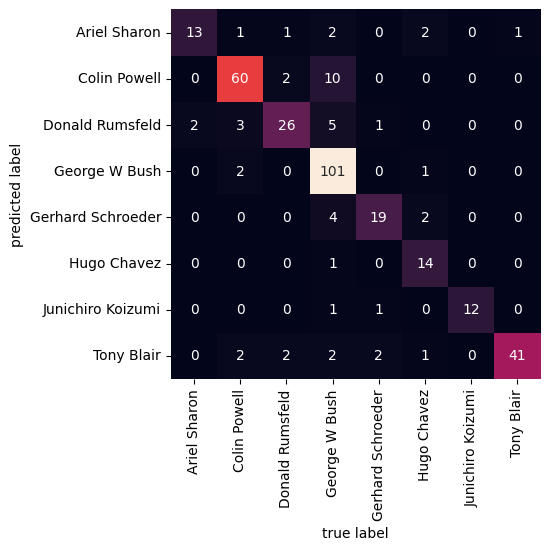

In [ ]:
# bentuk confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

# PRAKTIKUM 5

In [3]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
train_dir = "/content/drive/MyDrive/ML/image/training/"
test_dir = "/content/drive/MyDrive/ML/image/test/"

In [7]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [12]:
# Load training data
train_img = load_dataset(train_dir)

In [13]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [220, 215, 238],
         [236, 226, 251],
         [245, 235, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [190, 185, 208],
         [201, 193, 217],
         [213, 205, 229]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [233, 229, 252],
         [234, 229, 252],
         [229, 224, 247]],
 
        ...,
 
        [[ 48,  67,  84],
         [ 48,  67,  82],
         [ 48,  67,  84],
         ...,
         [ 96,  88,  77],
         [ 96,  88,  77],
         [ 96,  88,  77]],
 
        [[ 48,  65,  81],
         [ 48,  66,  80],
         [ 48,  65,  81],
         ...,
         [ 95,  87,  76],
         [ 95,  87,  76],
         [ 95,  87,  76]],
 
        [[ 47,  65,  79],
         [ 48,  66,  80],
         [ 48,  66,  80],
         ...,
         [ 98,  90,  79],
  

In [14]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 174
(372, 640, 3)


In [15]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (372, 640, 3)
Label	: night


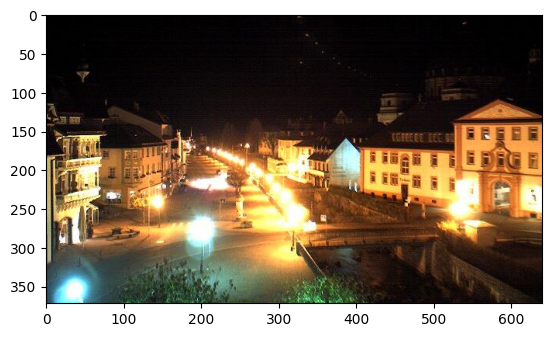

In [16]:
random_img_viz(train_img)

In [17]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [18]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [19]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [20]:
train_std_img_list = preprocess(train_img)

In [21]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 182
(600, 1100, 3)


In [22]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 160
Avg Brighness: 111.4930


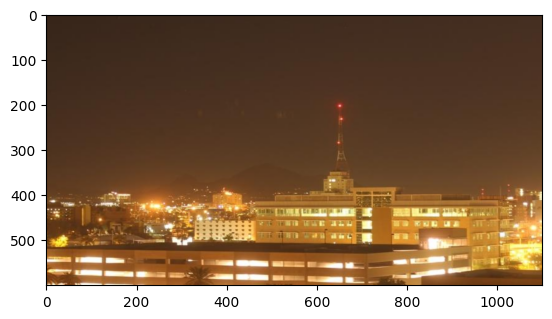

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

In [23]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 223
Actual label: 0
Predicted label: 0


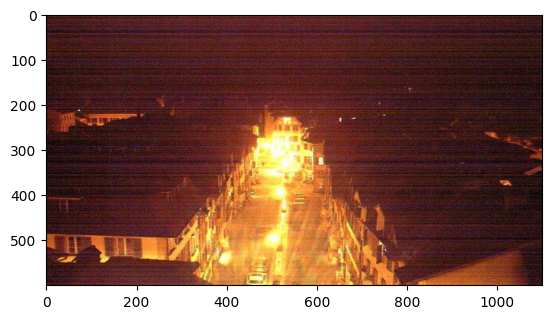

In [24]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

In [25]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [26]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


In [32]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


In [33]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [34]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,127.998211,1.0
1,170.984826,1.0
2,157.366744,1.0
3,129.001000,1.0
4,110.252348,1.0


In [36]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,150.264005,1.0
1,110.614936,1.0
2,132.243377,1.0
3,158.883767,1.0
4,93.140527,1.0


In [37]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

In [38]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


# TUGAS PRAKTIKUM


1. Buatlah model SVM dengan menggunakan data voice.csv dengan ketentuan,

- Split data dengan rasio 70:30 dan 80:20 untuk setiap model yang akan dibangun.
- Gunakan model dengan kernel linier.
- Gunakan model dengan kernel polynomial.
- Gunakan model dengan kernel RBF.
- Tabulasikan performansi setiap split dan kernel berdasarkan metrik akurasi.

2. Gunakan data pada praktikum 5 untuk membuat model klasifikasi siang dan malam menggunakan SVM dengan kernel RBF menggunakan fitur histrogram. Gunakan rasio 80:20. Anda dapat bereksperimen dengan hyperparameter tunning dari kernel RBF. Catat performansi akurasinya!

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [40]:
# Load dataset voice.csv
df = pd.read_csv("voice.csv")

# Pisahkan fitur dan label
X = df.drop(columns=["label"])
y = df["label"]


In [41]:
def evaluate_svm(X, y, test_size):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )

    # Normalisasi data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    results = {}

    # 1. Linear Kernel
    svm_linear = SVC(kernel='linear')
    svm_linear.fit(X_train, y_train)
    pred_linear = svm_linear.predict(X_test)
    results['linear'] = accuracy_score(y_test, pred_linear)

    # 2. Polynomial Kernel
    svm_poly = SVC(kernel='poly', degree=3)
    svm_poly.fit(X_train, y_train)
    pred_poly = svm_poly.predict(X_test)
    results['poly'] = accuracy_score(y_test, pred_poly)

    # 3. RBF Kernel
    svm_rbf = SVC(kernel='rbf')
    svm_rbf.fit(X_train, y_train)
    pred_rbf = svm_rbf.predict(X_test)
    results['rbf'] = accuracy_score(y_test, pred_rbf)

    return results


In [42]:
results_70 = evaluate_svm(X, y, test_size=0.30)
results_80 = evaluate_svm(X, y, test_size=0.20)


In [43]:
comparison = pd.DataFrame({
    "Kernel": ["Linear", "Polynomial", "RBF"],
    "Akurasi (70:30)": [
        results_70['linear'],
        results_70['poly'],
        results_70['rbf']
    ],
    "Akurasi (80:20)": [
        results_80['linear'],
        results_80['poly'],
        results_80['rbf']
    ]
})

print(comparison)


       Kernel  Akurasi (70:30)  Akurasi (80:20)
0      Linear         0.978970         0.974763
1  Polynomial         0.960042         0.955836
2         RBF         0.983176         0.982650


### Soal 2

In [44]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


In [45]:
train_dir = "/content/drive/MyDrive/ML/image/training/"
test_dir = "/content/drive/MyDrive/ML/image/test/"

In [53]:
def load_images_with_histogram(folder):
    data = []
    labels = []

    for label in ["day", "night"]:
        class_path = os.path.join(folder, label)
        for file in os.listdir(class_path):
            img_path = os.path.join(class_path, file)
            img = cv2.imread(img_path)

            if img is None:
                continue

            # Convert to HSV
            hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

            # Histogram 8x8x8
            hist = cv2.calcHist([hsv], [0,1,2], None, [8,8,8], [0,180,0,256,0,256])
            hist = cv2.normalize(hist, hist).flatten()

            data.append(hist)
            labels.append(1 if label == "day" else 0) # Corrected label assignment

    return np.array(data), np.array(labels)

In [54]:
train_dir = "/content/drive/MyDrive/ML/image/training/"
test_dir = "/content/drive/MyDrive/ML/image/test/"

X, y = load_images_with_histogram(train_dir)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


In [56]:
# SVM RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

y_pred = svm_rbf.predict(X_test)
baseline_acc = accuracy_score(y_test, y_pred)

print("Akurasi Model SVM RBF (baseline):", baseline_acc)


Akurasi Model SVM RBF (baseline): 0.9791666666666666


In [58]:
# Hyperparameter Tuning (GridSearch RBF)
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1]
}

grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, verbose=1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score (Train CV):", grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Params: {'C': 10, 'gamma': 'scale'}
Best Score (Train CV): 1.0


In [61]:
# Evaluasi Model Terbaik
best_svm = grid.best_estimator_

y_pred_best = best_svm.predict(X_test)
best_acc = accuracy_score(y_test, y_pred_best)

print("Akurasi Model SVM RBF (Setelah Tuning):", best_acc)


Akurasi Model SVM RBF (Setelah Tuning): 0.9791666666666666
